# 딥러닝 (3)
## 오차제곱합
모델이 예측한 값과 실제 값이 얼마나 차이 나는지(이것을 '오차'라고 해요) 측정합니다. 이 오차들을 '제곱'해서 모두 더한 값이 바로 오차제곱합(SSE) 입니다. SSE 값이 작을수록 모델이 예측을 더 잘한다고 볼 수 있습니다.

In [1]:
import numpy as np
# 실제 시험 점수 (우리가 이미 알고 있는 정답 값)
actual_scores = np.array([60, 75, 80, 85, 95])
actual_scores

array([60, 75, 80, 85, 95])

In [2]:
# 모델이 예측한 시험 점수
predicted_scores = np.array([55, 78, 75, 88, 92])
predicted_scores

array([55, 78, 75, 88, 92])

In [4]:
# 오차 계산.
errors = actual_scores - predicted_scores
errors

array([ 5, -3,  5, -3,  3])

In [6]:
np.sum(errors ** 2)

77

In [7]:
def sum_squares_error(p, r):
    return np.sum((p - r) ** 2) 

In [9]:
import numpy as np
real = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])
sum_squares_error(pred, real)

0.19500000000000006

In [10]:
real = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])
sum_squares_error(pred, real)

1.3949999999999998

## 교차 엔트로피 오차
교차 엔트로피 오차는 주로 ```카테고리(범주)```를 맞추는 분류 문제에 사용됩니다. 모델이 예측한 확률 분포와 실제 정답의 확률 분포가 얼마나 다른지를 측정합니다. 모델이 틀린 답을 높은 확률로 예측할수록 오차(벌점)를 크게 주고, 맞는 답을 높은 확률로 예측할수록 오차를 작게 줍니다.

In [2]:
real = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])

-np.sum(np.log(pred + 1e-7) * real)

0.510825457099338

In [3]:
def cross_entropy_error(p, r):
    return -np.sum(r * np.log(p + 1e-7))

In [5]:
real = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])
cross_entropy_error(pred, real)

0.510825457099338

In [4]:
real = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])
cross_entropy_error(pred, real)

16.11809565095832

In [47]:
def cross_entropy_error(p, r):
    size = len(p)
    return -np.sum(np.log(p[np.arange(size), r] + 1e-7)) / size

In [46]:
real = np.array([3, 2])
pred = np.array([[0.1, 0.2, 0.3, 0.4],
                 [0.1, 0.1, 0.7, 0.1]])

pred[np.arange(2), real]

array([0.4, 0.7])

In [ ]:
real = 2
pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])

## 편미분 (Partial Derivative)
편미분은 함수에 입력 변수가 여러 개 있을 때 사용합니다. 여러 입력 변수 중 딱 하나만 변수 취급하고, 나머지 변수들은 숫자(상수)처럼 고정시킨 상태에서 미분합니다. 즉, 특정 변수의 아주 작은 변화가 함수의 결과값을 얼마나 변화시키는지 보는 것입니다.

In [20]:
def numerical_diff(f, x):
    h = 1e-9
    return (f(x+h) - f(x-h)) / (2 * h)

In [21]:
def func1(x):
    return x ** 2

In [22]:
numerical_diff(func1, 2)

4.000000330961484

In [23]:
def func2(x):
    return x[0] ** 2 + x[1] ** 2

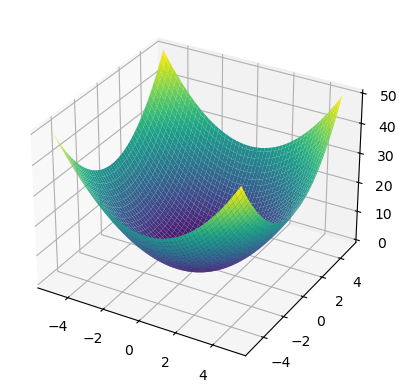

In [26]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

z = func2([x, y])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x, y, z, cmap = "viridis")
plt.show()

In [34]:
def numerical_gradient(f, x):
    h = 1e-7
    grad = np.zeros_like(x)
    
    for idx in np.ndindex(x.shape):
        val = x[idx]
        x[idx] = val + h
        fxh1 = f(x)

        x[idx] = val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = val

    return grad

In [36]:
a = np.array([3,4])
numerical_gradient(func2, a)

array([25000000, 35000000])

## 딥러닝 구현하기

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 1:
        c = np.max(x)
        exp_a = np.exp(x-c)
        sum_exp_a = np.sum(exp_a)
        y = exp_a / sum_exp_a
        return y
    elif x.ndim == 2:
        c = np.max(x, axis = 1).reshape(-1, 1)
        exp_a = np.exp(x - c)
        sum_exp_a = np.sum(exp_a, axis = 1).reshape(-1, 1)
        y = exp_a / sum_exp_a
        return y

In [49]:
class MyNet:
    def __init__(self, I, H, O):
        self.params = {}
        self.params["w1"] = np.random.randn(I, H)
        self.params['b1'] = np.random.randn(H)
        self.params['w2'] = np.random.randn(H, O)
        self.params['b2'] = np.random.randn(O)

    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = x @ w1 + b1
        z1 = sigmoid(a1)
        a2 = z1 @ w2 + b2
        y = softmax(a2)
        return y

    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        acc = np.sum(y == t) / x.shape[0]
        return acc

    def numerical_graident(self, x, t):
        loss = lambda i : self.loss(x, t)
        grads = {}
        grads['w1'] = numerical_gradient(loss, self.params['w1'])
        grads['b1'] = numerical_gradient(loss, self.params['b1'])
        grads['w2'] = numerical_gradient(loss, self.params['w2'])
        grads['b2'] = numerical_gradient(loss, self.params['b2'])
        return grads

In [43]:
net = MyNet(3, 4, 3)
a = np.array([1,1,1])
net.predict(a)

array([0.31582874, 0.06971315, 0.61445811])

In [50]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
Y = iris.target

In [53]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [60]:
train_losses = []
test_losses = []

train_size = len(train_x)
batch_size = 100 # 112개중 랜덤으로 100개만 꺼내서 학습.
lr = 0.1

model = MyNet(4, 8, 3)

from tqdm import tqdm

for i in tqdm(range(1000)):
    mask = np.random.choice(train_size, batch_size)
    x_batch = train_x[mask]
    t_batch = train_y[mask]

    grad = model.numerical_graident(x_batch, t_batch)

    for key in ['w1', 'b1', 'w2', 'b2']:
        model.params[key] -= grad[key] * lr

    loss = model.loss(train_x, train_y)
    test_loss = model.loss(test_x, test_y)

    train_losses.append(loss)
    test_losses.append(test_loss)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 38.76it/s]


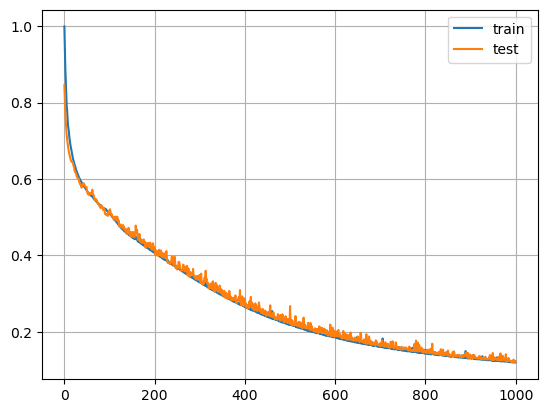

In [61]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.grid()
plt.show()

In [67]:
from sklearn.metrics import classification_report
pred = np.argmax(model.predict(test_x), axis = 1)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [66]:
test_y

array([2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2,
       2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2])

## 연습문제
1. 오차제곱합 (SSE) 계산: 실제 값 배열 actual = np.array([10, 20, 30, 40])과 모델 예측 값 배열 predicted = np.array([12, 18, 33, 38])이 주어졌을 때, 넘파이(NumPy)를 사용하여 오차제곱합(SSE)을 계산하는 코드를 작성하세요.

2. 교차 엔트로피 오차 (CEE) 계산: 실제 정답 레이블(원-핫 인코딩) t = np.array([0, 1, 0])와 모델의 예측 확률 y = np.array([0.1, 0.8, 0.1])가 주어졌을 때, 넘파이를 사용하여 교차 엔트로피 오차(CEE)를 계산하는 코드를 작성하세요 (로그 계산 시 delta = 1e-7 사용).

3. 수치 미분 (Numerical Differentiation): 함수 f(x)=0.5x^2+2x+1 가 주어졌을 때, x=3 에서의 수치 미분 값을 구하는 코드를 작성하세요 (h=1e−4).

4. 기울기 (Gradient) 계산: 함수 f(x0,x1) = x0^2 + x1^3 이 주어졌을 때, 점 (x0=2,x1=3) 에서의 기울기(각 변수에 대한 편미분 벡터)를 numerical_gradient 함수를 사용하여 구하는 코드를 작성하세요.

5. fish.csv 파일로 생선을 분류하는 딥러닝 모델을 만들어보세요.